In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [47]:
df=pd.read_csv('cars.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
age       963 non-null int64
gender    963 non-null int64
miles     963 non-null int64
debt      963 non-null int64
income    963 non-null int64
sales     963 non-null int64
dtypes: int64(6)
memory usage: 45.3 KB


In [49]:
x=df.drop('sales',axis=1)
y=df['sales']


In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=201)

In [51]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((770, 5), (770,), (193, 5), (193,))

In [52]:
scaler=MinMaxScaler()

In [53]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [54]:
ytrain=np.asarray(ytrain)
ytest=np.asarray(ytest)

In [55]:
type(xtrain),type(ytrain),type(xtest),type(ytest)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [56]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [58]:
history = model.fit(xtrain, ytrain, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 616 samples, validate on 154 samples
Epoch 1/150
616/616 [==============================] - 1s 1ms/sample - loss: 219059350.6494 - mse: 219059344.0000 - mae: 11748.3096 - val_loss: 221026249.1429 - val_mse: 221026256.0000 - val_mae: 11894.9834
Epoch 2/150
616/616 [==============================] - 0s 120us/sample - loss: 219057279.9481 - mse: 219057264.0000 - mae: 11748.2285 - val_loss: 221023979.8442 - val_mse: 221023984.0000 - val_mae: 11894.8965
Epoch 3/150
616/616 [==============================] - 0s 97us/sample - loss: 219054667.3247 - mse: 219054672.0000 - mae: 11748.1270 - val_loss: 221021006.9610 - val_mse: 221021008.0000 - val_mae: 11894.7822
Epoch 4/150
616/616 [==============================] - 0s 233us/sample - loss: 219051307.4805 - mse: 219051280.0000 - mae: 11748.0010 - val_loss: 221017291.0130 - val_mse: 221017312.0000 - val_mae: 11894.6416
Epoch 5/150
616/616 [==============================] - 0s 328us/sample - loss: 219047004.1039 - mse: 219047008.0000 - mae

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


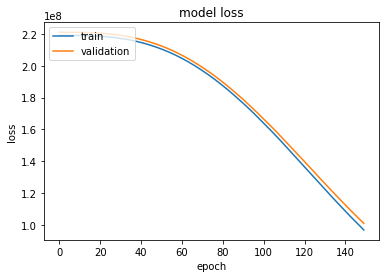

In [59]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [60]:
predicted_value=model.predict(xtest)

In [61]:
predicted_value=predicted_value.reshape(-1,)

In [62]:
results=pd.DataFrame({'Actual':ytest,'Predicted':predicted_value})

In [63]:
results.head()

,Actual,Predicted
0,7960,4470.063477
1,23894,7050.045410
2,15064,6434.330566
3,16803,7989.776367
4,25470,7495.109863


## Use the new Data for prediction

In [64]:
xnew = np.array([[40, 0, 26, 9000, 8000]])
xnew= scaler.transform(xnew)
ynew= model.predict(xnew)
#invert normalize
#ynew = scaler_y.inverse_transform(ynew) 
xnew1 = scaler.inverse_transform(xnew)
print("X=%s, Predicted=%s" % (xnew1[0], ynew[0]))

X=[  40.    0.   26. 9000. 8000.], Predicted=[5017.2554]
